# 数据分布

In [98]:
# 导入依赖
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection  import cross_val_score

from scipy import stats
import seaborn as sns
from copy import deepcopy

%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [99]:
# 加载数据
train = pd.read_csv(r"case2_training.csv", dtype=float)
test = pd.read_csv(r"case2_testing.csv", dtype=float)

# 观察数据
train

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept
0,1.0,4.0,32.0,5.0,1.0,1.0,4.526975,0.739994,230.552998,0.0
1,2.0,2.0,87.0,4.0,1.0,1.0,4.548455,0.862642,348.203425,0.0
2,3.0,5.0,277.0,5.0,1.0,2.0,4.965732,0.515548,430.462327,0.0
3,4.0,3.0,246.0,2.0,1.0,1.0,4.752735,0.561547,149.305433,1.0
4,5.0,1.0,155.0,2.0,1.0,2.0,3.890960,0.817142,165.264184,1.0
...,...,...,...,...,...,...,...,...,...,...
49995,49996.0,1.0,68.0,6.0,0.0,1.0,3.669174,0.858494,199.187671,1.0
49996,49997.0,9.0,217.0,1.0,1.0,2.0,4.849890,0.678795,348.927419,0.0
49997,49998.0,10.0,100.0,3.0,1.0,2.0,4.971527,0.993316,317.187052,1.0
49998,49999.0,10.0,170.0,3.0,1.0,2.0,4.951120,0.792698,460.453975,0.0


In [100]:
train.describe()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,25000.500000,5.495460,182.824300,3.99276,0.801840,1.495760,4.509402,0.750261,316.963436,0.27032
std,14433.901067,2.862611,105.653134,2.00837,0.398617,0.693189,0.460287,0.193746,92.644791,0.44413
min,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,3.000000,0.036809,80.000000,0.00000
25%,12500.750000,3.000000,91.000000,2.00000,1.000000,1.000000,4.306552,0.630497,251.637842,0.00000
50%,25000.500000,5.000000,183.000000,4.00000,1.000000,1.000000,4.652005,0.794165,315.334386,0.00000
75%,37500.250000,8.000000,274.000000,6.00000,1.000000,2.000000,4.855238,0.908876,378.920370,1.00000
max,50000.000000,10.000000,365.000000,7.00000,1.000000,4.000000,4.999996,0.999985,726.527643,1.00000


In [101]:
# 查看缺失值
pd.isnull(train).values.any()  # False表示没有缺失值

False

In [102]:
#  连续值与离散值
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           50000 non-null  float64
 1   Region       50000 non-null  float64
 2   Date         50000 non-null  float64
 3   Weekday      50000 non-null  float64
 4   Apartment    50000 non-null  float64
 5   Beds         50000 non-null  float64
 6   Review       50000 non-null  float64
 7   Pic Quality  50000 non-null  float64
 8   Price        50000 non-null  float64
 9   Accept       50000 non-null  float64
dtypes: float64(10)
memory usage: 3.8 MB


In [103]:
# 查看离散特征和连续特征个数
cat_features = list(train.select_dtypes(include=['object']))
print('离散特征Categorical: {} features'.format(len(cat_features)))

cont_features = [cont for cont in list(train.select_dtypes(include=['float64','int64'])) if cont not in ['loss','id']]
print('连续特征Continuous: {} features'.format(len(cont_features)))

离散特征Categorical: 0 features
连续特征Continuous: 10 features


In [104]:
# #统计类别属性中不同类别的个数
# cat_uniques=[]
# for cat in cat_features:    
#     cat_uniques.append(len(df_train[cat].unique())) 
# uniq_values_in_categories = pd.DataFrame.from_dict([('cat_name',cat_features),('unique_values',cat_uniques)])

# uniq_values_in_categories.head()

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Weekday'}>,
        <Axes: title={'center': 'Apartment'}>,
        <Axes: title={'center': 'Beds'}>],
       [<Axes: title={'center': 'Review'}>,
        <Axes: title={'center': 'Pic Quality'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Accept'}>, <Axes: >, <Axes: >]],
      dtype=object)

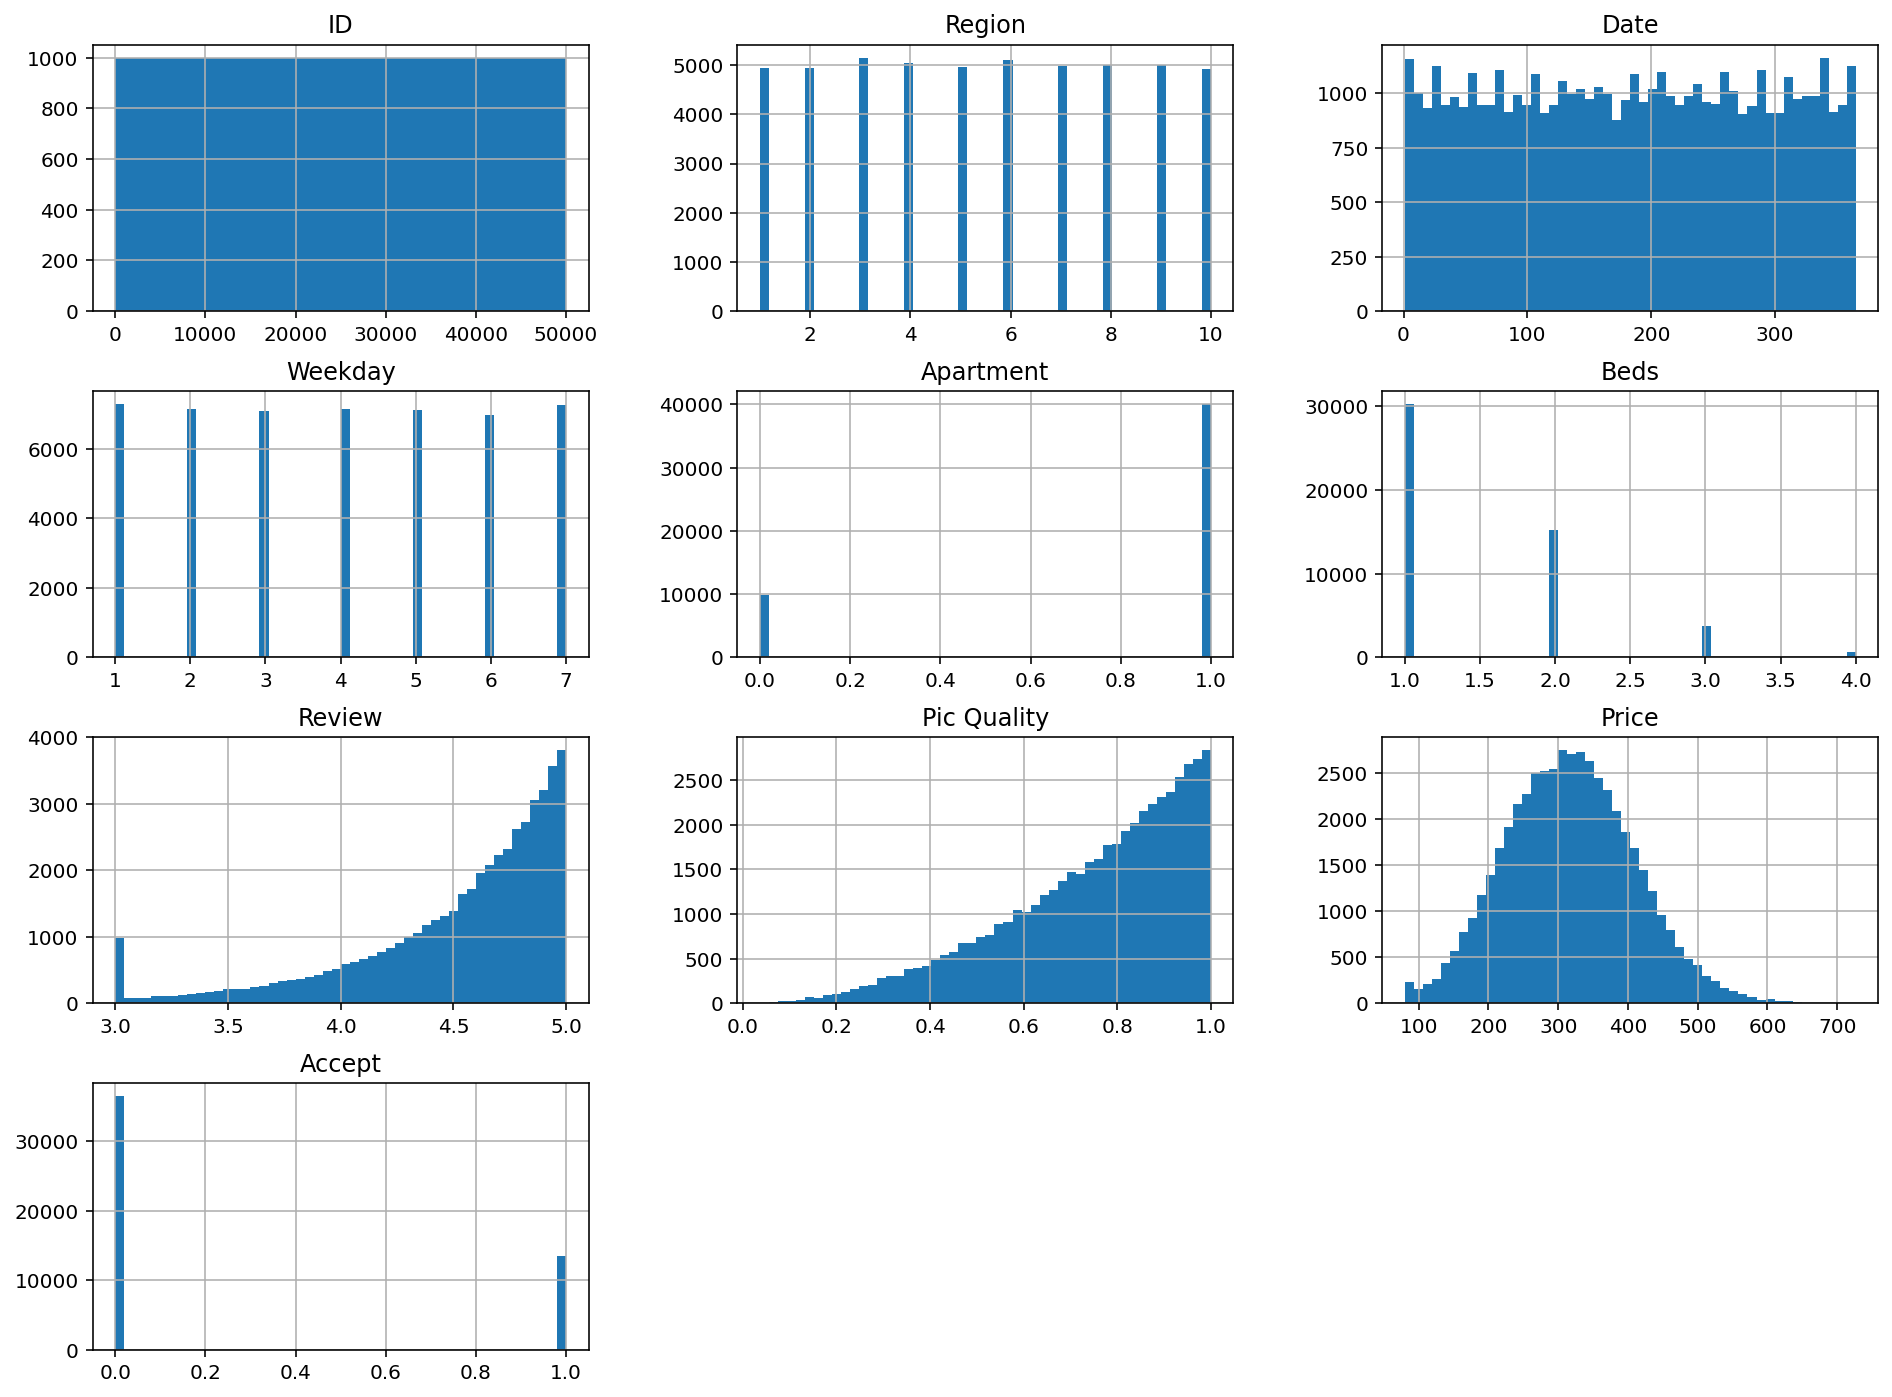

In [105]:
# 连续值特征
train[cont_features].hist(bins=50,figsize=(16,12))

<Axes: >

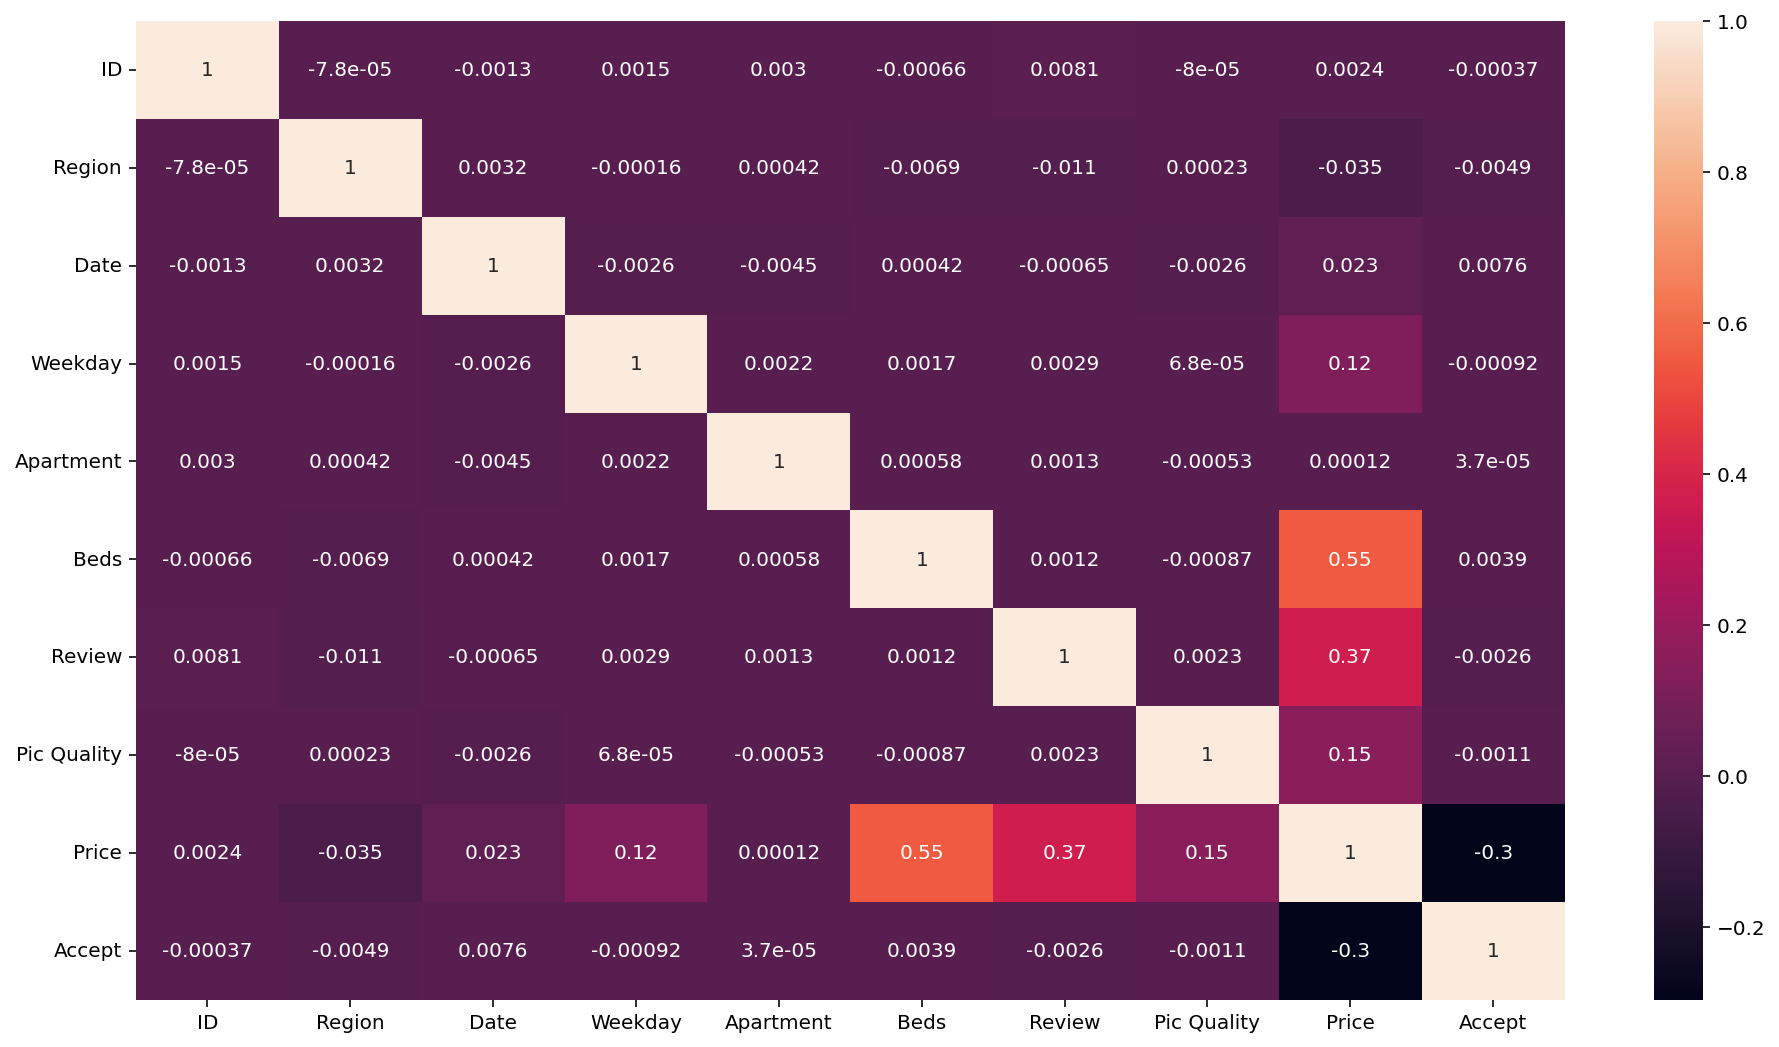

In [106]:
# 特征之间的相关性
plt.subplots(figsize=(16,9))
correlation_mat = train[cont_features].corr()
sns.heatmap(correlation_mat,annot=True)

In [107]:
# 偏度 度量了实值随机变量的均值分布的不对称性
print(stats.mstats.skew(train['Review']).data)
print(stats.mstats.skew(train['Pic Quality']).data)
print(stats.mstats.skew(train['Price']).data)

-1.4104366478062178
-0.8624548449697734
0.17236328135250364


In [108]:
# 偏度值比1大，说明数据是倾斜的。不利于数据建模。我们利用对数变换np.log，使倾斜降低。
stats.mstats.skew(np.log1p(train['Review'])).data  # 似乎更差了，为啥

array(-1.6462799)

## 数据预处理

In [109]:
train = pd.get_dummies(train, columns = ['Region'], drop_first=True,dtype=int)
test = pd.get_dummies(test, columns = ['Region'], drop_first=True,dtype=int)

train = pd.get_dummies(train, columns = ['Weekday'], drop_first=True,dtype=int)
test = pd.get_dummies(test, columns = ['Weekday'], drop_first=True,dtype=int)
# 实际上xgboost不需要改成dummy

In [110]:

# divide the Date into 7 groups
count=0
for i in train.Date:
    train.loc[count, 'day_3']=1 if 1<=i<=3 else 0
    train.loc[count,'day_7']=1 if 4<=i<=7 else 0
    train.loc[count,'day14']=1 if 8<=i<=14 else 0
    train.loc[count,'day_31']=1 if 15<=i<=31 else 0
    train.loc[count,'day_90']=1 if 32<=i<=90 else 0
    train.loc[count,'day_180']=1 if 91<=i<=180 else 0
    train.loc[count,'day_365']=1 if 181<=i<=365 else 0
    count+=1
train

,ID,Date,Apartment,Beds,Review,Pic Quality,Price,Accept,Region_2.0,Region_3.0,...,Weekday_5.0,Weekday_6.0,Weekday_7.0,day_3,day_7,day14,day_31,day_90,day_180,day_365
0,1.0,32.0,1.0,1.0,4.526975,0.739994,230.552998,0.0,0,0,...,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,87.0,1.0,1.0,4.548455,0.862642,348.203425,0.0,1,0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,277.0,1.0,2.0,4.965732,0.515548,430.462327,0.0,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,246.0,1.0,1.0,4.752735,0.561547,149.305433,1.0,0,1,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,155.0,1.0,2.0,3.890960,0.817142,165.264184,1.0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996.0,68.0,0.0,1.0,3.669174,0.858494,199.187671,1.0,0,0,...,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49996,49997.0,217.0,1.0,2.0,4.849890,0.678795,348.927419,0.0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49997,49998.0,100.0,1.0,2.0,4.971527,0.993316,317.187052,1.0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,49999.0,170.0,1.0,2.0,4.951120,0.792698,460.453975,0.0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
count = 0
for i in test.Date:
    test.loc[count, 'day_3']=1 if 1<=i<=3 else 0
    test.loc[count,'day_7']=1 if 4<=i<=7 else 0
    test.loc[count,'day14']=1 if 8<=i<=14 else 0
    test.loc[count,'day_31']=1 if 15<=i<=31 else 0
    test.loc[count,'day_90']=1 if 32<=i<=90 else 0
    test.loc[count,'day_180']=1 if 91<=i<=180 else 0
    test.loc[count,'day_365']=1 if 181<=i<=365 else 0
    count+=1
test

,ID,Date,Apartment,Beds,Review,Pic Quality,Price,Region_2.0,Region_3.0,Region_4.0,...,Weekday_5.0,Weekday_6.0,Weekday_7.0,day_3,day_7,day14,day_31,day_90,day_180,day_365
0,1.0,64.0,1.0,1.0,4.923078,0.683932,284.734165,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,41.0,1.0,1.0,4.842211,0.958800,295.051733,0,0,0,...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,275.0,1.0,3.0,4.702331,0.500134,385.070370,1,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,323.0,1.0,1.0,4.388125,0.986082,204.353588,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,311.0,0.0,1.0,3.868994,0.652980,285.488105,0,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996.0,284.0,1.0,2.0,3.000000,0.611866,192.158094,0,0,1,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19996,19997.0,292.0,1.0,1.0,3.305345,0.953897,229.037124,0,0,0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19997,19998.0,295.0,0.0,1.0,4.971692,0.902279,287.498583,1,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19998,19999.0,250.0,1.0,3.0,3.946708,0.975978,369.307960,0,0,0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [112]:
train.to_csv(r'training data')
test.to_csv(r'testing data')

# XGBoost调参策略

In [113]:
# 导入依赖
import pandas as pd 
import numpy as np
import xgboost as xgb
import pickle
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import KFold,train_test_split

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [114]:
train = pd.read_csv(r"training data", dtype=float)
test = pd.read_csv(r"testing data", dtype=float)

In [115]:
train_x = train.drop(columns=["ID","Accept","Unnamed: 0"])
train_y = train.drop(columns="ID")["Accept"]
print(train_x.shape)
train_y.shape

(50000, 28)


(50000,)

### Simple XGBoost Model

In [116]:
# 首先，我们训练一个基本的xgboost模型，然后进行参数调节通过交叉验证来观察结果的变换，使用平均绝对误差衡量 mean_absolute_error(np.exp(y),np.exp(yhat))。
# xgboost 自定义一个数据矩阵类 DMatrix，会在训练开始时，进行一边预处理，从而提高之后每次迭代的效率。

### 结果衡量方法

In [117]:
#评估策略，e的次幂，用来评估。
#结果衡量方法：使用平均绝对误差来衡量
#mean_absolute_error(np.exp(y), np.exp(yhat))。
#定义计算损失值的函数
def xg_eval_mae(yhat,dtrain):
    y = dtrain.get_label()
    return 'mae',mean_absolute_error(np.exp(y),np.exp(yhat))

### Model

In [118]:
#数据类型转换成库可以使用的底层格式。
dtrain = xgb.DMatrix(train_x,train['Accept'])
dtrain

### XGBoost 参数

In [119]:
"""""""""
booster : gbtree, 用什么方法进行结点分裂。梯度提升树来进行结点分裂。
objective : multi softmax, 使用的损失函数，softmax 是多分类问题
num_class : 10, 类别数，与 multi softmax 并用
gamma : 损失下降多少才进行分裂
max_depth : 12, 构建树的深度, 越大越容易过拟合
lambda : 2, 控制模型复杂度的权重值的L2正则化项参数，参数越大。模型越不容易过拟合。
subsample : 0.7 , 随机采样训练样本，取70%的数据训练
colsample_bytree : 0.7, 生成树时进行的列采样
min_child_weight : 3, 孩子节点中最小的样本权重和，如果一个叶子结点的样本权重和小于 min_child_weight 则拆分过程结果
slient : 0, 设置成 1 则没有运行信息输出，最好是设置为0
eta : 0.007, 如同学习率。前面的树都不变了，新加入一棵树后对结果的影响占比
seed : 1000
Thread : 7, cup 线程数
"""""""""

'\nbooster : gbtree, 用什么方法进行结点分裂。梯度提升树来进行结点分裂。\nobjective : multi softmax, 使用的损失函数，softmax 是多分类问题\nnum_class : 10, 类别数，与 multi softmax 并用\ngamma : 损失下降多少才进行分裂\nmax_depth : 12, 构建树的深度, 越大越容易过拟合\nlambda : 2, 控制模型复杂度的权重值的L2正则化项参数，参数越大。模型越不容易过拟合。\nsubsample : 0.7 , 随机采样训练样本，取70%的数据训练\ncolsample_bytree : 0.7, 生成树时进行的列采样\nmin_child_weight : 3, 孩子节点中最小的样本权重和，如果一个叶子结点的样本权重和小于 min_child_weight 则拆分过程结果\nslient : 0, 设置成 1 则没有运行信息输出，最好是设置为0\neta : 0.007, 如同学习率。前面的树都不变了，新加入一棵树后对结果的影响占比\nseed : 1000\nThread : 7, cup 线程数\n'

In [120]:
xgb_params = {
    'seed': 0,
    'eta': 0.1,
    'colsample_bytree': 0.5,
    'silent': 1,
    'subsample': 0.5,
    'objective': 'reg:linear',
    'max_depth': 5,
    'min_child_weight': 3
}

[15:11:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[15:11:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:11:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[15:11:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objecti

<Axes: >

<Figure size 432x288 with 0 Axes>

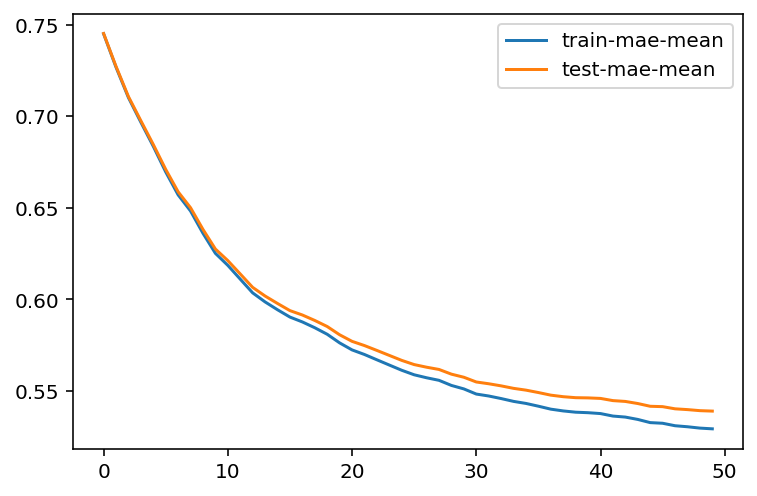

In [121]:
%%time

#feval:评估策略
bst_cv1 = xgb.cv(xgb_params, dtrain, num_boost_round=50, nfold=3, seed=0, 
                feval=xg_eval_mae, maximize=False, early_stopping_rounds=10)

print ('CV score:', bst_cv1.iloc[-1,:]['test-mae-mean'])

plt.figure()
bst_cv1[['train-mae-mean', 'test-mae-mean']].plot() 

[15:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[15:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[15:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objecti

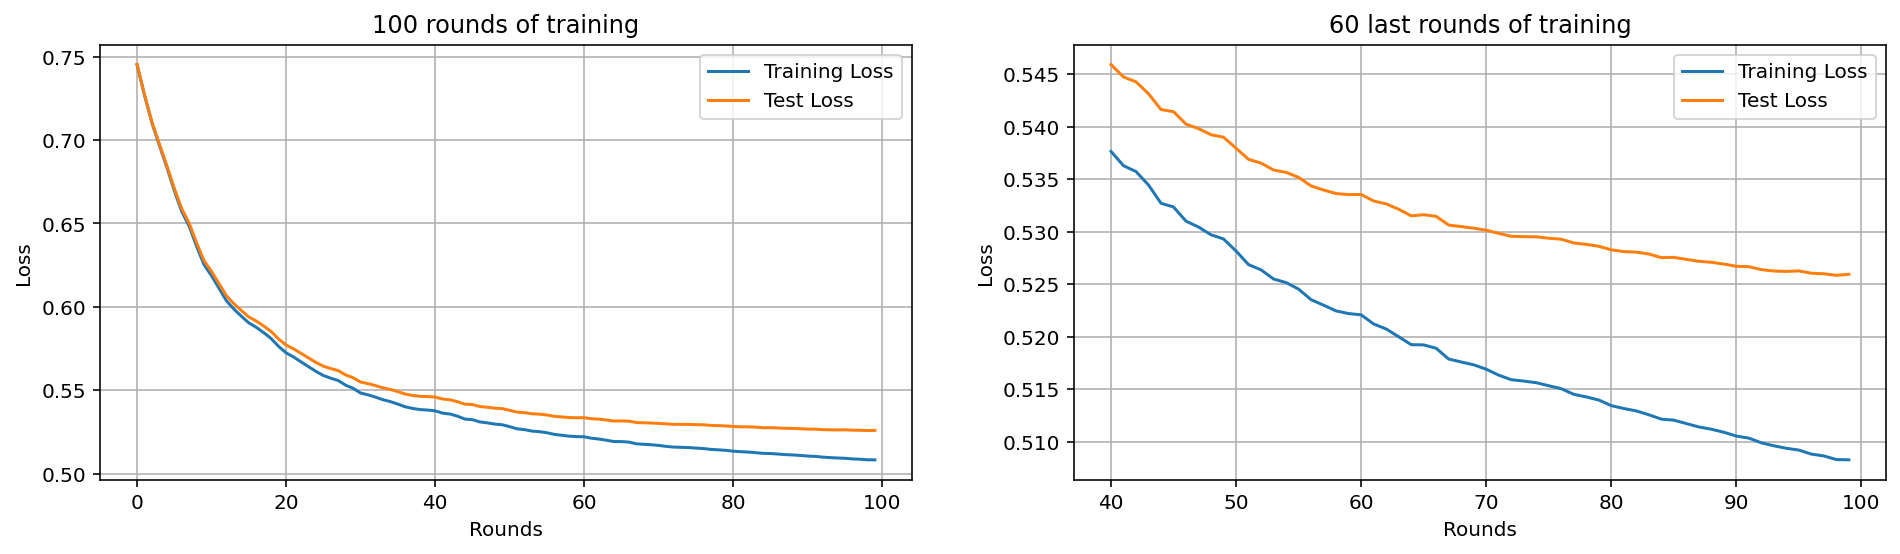

In [122]:
%%time
#建立100个树模型
bst_cv2 = xgb.cv(xgb_params, dtrain, num_boost_round=100, 
                nfold=3, seed=0, feval=xg_eval_mae, maximize=False, 
                early_stopping_rounds=10)

print ('CV score:', bst_cv2.iloc[-1,:]['test-mae-mean'])

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,4)

ax1.set_title('100 rounds of training')
ax1.set_xlabel('Rounds')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.plot(bst_cv2[['train-mae-mean', 'test-mae-mean']])
ax1.legend(['Training Loss', 'Test Loss'])

ax2.set_title('60 last rounds of training')
ax2.set_xlabel('Rounds')
ax2.set_ylabel('Loss')
ax2.grid(True)
ax2.plot(bst_cv2.iloc[40:][['train-mae-mean', 'test-mae-mean']])
ax2.legend(['Training Loss', 'Test Loss']) 

In [123]:
"""""""""
一般Xgboost调优的顺序可以参考如下：
确定一个较大的学习速率0.1
num_boost_round调优
max_depth 和 min_weight 参数调优
gamma参数调优
正则化参数调优
降低学习速率
"""""""""

'\n一般Xgboost调优的顺序可以参考如下：\n确定一个较大的学习速率0.1\nnum_boost_round调优\nmax_depth 和 min_weight 参数调优\ngamma参数调优\n正则化参数调优\n降低学习速率\n'

Step 1: 选择一组初始参数
Step 2: 改变 max_depth 和 min_child_weight.
Step 3: 调节 gamma 降低模型过拟合风险.
Step 4: 调节 subsample 和 colsample_bytree 改变数据采样策略.
Step 5: 调节学习率 eta.

### Step 1: 基准模型

In [124]:
class XGBoostRegressor(object):
    def __init__(self, **kwargs):
        self.params = kwargs
        if 'num_boost_round' in self.params:
            self.num_boost_round = self.params['num_boost_round']
        self.params.update({'silent': 1, 'objective': 'reg:linear', 'seed': 0})#默认参数
        
    def fit(self, x_train, y_train):
        '''
        #数据类型转换,#用参数去训练xgboost模型
        '''
        dtrain = xgb.DMatrix(x_train, y_train) 
        self.bst = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round,
                             feval=xg_eval_mae, maximize=False)
        
    def predict(self, x_pred):
        dpred = xgb.DMatrix(x_pred)
        self.bst = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round,
                             feval=xg_eval_mae, maximize=False)
        return self.bst.predict(dpred)
    
    def kfold(self, x_train, y_train, nfold=5):
        dtrain = xgb.DMatrix(x_train, y_train)
        cv_rounds = xgb.cv(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round,
                           nfold=nfold, feval=xg_eval_mae, maximize=False, early_stopping_rounds=10)
        return cv_rounds.iloc[-1,:]
    
    def plot_feature_importances(self):
        feat_imp = pd.Series(self.bst.get_fscore()).sort_values(ascending=False)
        feat_imp.plot(title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        self.params.update(params)
        return self 

#衡量标准
def mae_score(y_true, y_pred):
    return mean_absolute_error(np.exp(y_true), np.exp(y_pred))

mae_scorer = make_scorer(mae_score, greater_is_better=False)

bst = XGBoostRegressor(eta=0.1, colsample_bytree=0.5, subsample=0.5, 
                       max_depth=5, min_child_weight=3, num_boost_round=50)

bst.kfold(train_x, train_y, nfold=5)

[15:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[15:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[15:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

train-rmse-mean    0.396617
train-rmse-std     0.000783
test-rmse-mean     0.403543
test-rmse-std      0.001497
train-mae-mean     0.532048
train-mae-std      0.002469
test-mae-mean      0.540416
test-mae-std       0.002957
Name: 49, dtype: float64

In [177]:
train_x

,Date,Apartment,Beds,Review,Pic Quality,Price,Region_2.0,Region_3.0,Region_4.0,Region_5.0,...,Weekday_5.0,Weekday_6.0,Weekday_7.0,day_3,day_7,day14,day_31,day_90,day_180,day_365
0,32.0,1.0,1.0,4.526975,0.739994,230.552998,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,87.0,1.0,1.0,4.548455,0.862642,348.203425,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,277.0,1.0,2.0,4.965732,0.515548,430.462327,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,246.0,1.0,1.0,4.752735,0.561547,149.305433,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,155.0,1.0,2.0,3.890960,0.817142,165.264184,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,68.0,0.0,1.0,3.669174,0.858494,199.187671,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49996,217.0,1.0,2.0,4.849890,0.678795,348.927419,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49997,100.0,1.0,2.0,4.971527,0.993316,317.187052,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,170.0,1.0,2.0,4.951120,0.792698,460.453975,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


按照训练集处理方式，处理我们的测试集

In [128]:
test # 没有loss列,loss需要预测

#features_test = [x for x in test.columns if x not in ['id']]

test_x = test.drop(columns=["ID","Unnamed: 0"])

test_x

,Date,Apartment,Beds,Review,Pic Quality,Price,Region_2.0,Region_3.0,Region_4.0,Region_5.0,...,Weekday_5.0,Weekday_6.0,Weekday_7.0,day_3,day_7,day14,day_31,day_90,day_180,day_365
0,64.0,1.0,1.0,4.923078,0.683932,284.734165,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,41.0,1.0,1.0,4.842211,0.958800,295.051733,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,275.0,1.0,3.0,4.702331,0.500134,385.070370,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,323.0,1.0,1.0,4.388125,0.986082,204.353588,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,311.0,0.0,1.0,3.868994,0.652980,285.488105,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,284.0,1.0,2.0,3.000000,0.611866,192.158094,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19996,292.0,1.0,1.0,3.305345,0.953897,229.037124,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19997,295.0,0.0,1.0,4.971692,0.902279,287.498583,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19998,250.0,1.0,3.0,3.946708,0.975978,369.307960,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [129]:
#数据类型转换成库可以使用的底层格式。
dtest_x = xgb.DMatrix(test_x)
#dtest_x
#得到我们想要的测试集


#预测命令：
#xgb.predict(dtest_x)
test_y = bst.predict(test_x)

test_y[1],len(test_y)

[15:22:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:22:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



(0.31845337, 20000)

In [199]:
test_y

array([0.15299658, 0.31845337, 0.35591668, ..., 0.21955076, 0.36896664,
       0.30668116], dtype=float32)

In [130]:
import math

#math.exp(test_y[0])
test_exp_y= np.zeros(len(test_y))
for i in range(len(test_y)):
    test_exp_y[i] = math.exp(test_y[i])
test_exp_y.shape

(20000,)

### Step 2: 树的深度与节点权重

这些参数对xgboost性能影响最大，因此，他们应该调整第一。我们简要地概述它们： max_depth: 树的最大深度。增加这个值会使模型更加复杂，也容易出现过拟合，深度3-10是合理的。 min_child_weight: 正则化参数. 如果树分区中的实例权重小于定义的总和，则停止树构建过程。

In [131]:
xgb_param_grid = {'max_depth': list(range(4,9)), 'min_child_weight': list((1,3,6))}
xgb_param_grid['max_depth'] 

[4, 5, 6, 7, 8]

In [136]:
%%time

#交叉验证 网格搜索
grid = GridSearchCV(XGBoostRegressor(eta=0.1, num_boost_round=50, colsample_bytree=0.5, subsample=0.5),
                param_grid=xgb_param_grid, cv=5, scoring = mae_scorer)

grid.fit(train_x, train_y.values)


[15:38:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[15:38:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[15:38:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

GridSearchCV(cv=5,
             estimator=<__main__.XGBoostRegressor object at 0x000002231254ADF0>,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 3, 6]},
             scoring=make_scorer(mae_score, greater_is_better=False))

In [144]:
from sklearn.model_selection import GridSearchCV
GridSearchCV(cv=5, error_score='raise-deprecating',  n_jobs=None,
             estimator=XGBoostRegressor,
             # iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 3, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mae_score, greater_is_better=False),
             verbose=0)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<class '__main__.XGBoostRegressor'>,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 3, 6]},
             scoring=make_scorer(mae_score, greater_is_better=False))

In [146]:
#grid.grid_scores_, grid.best_params_, grid.best_score_  #旧版本
#print(grid.cv_results_)#新版本
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params'])
print('************************************')
print(grid.best_params_)
print('************************************')
print(grid.best_score_ )

[-0.53942821 -0.53947315 -0.53951854 -0.53188091 -0.53202731 -0.53217653
 -0.52401862 -0.52454086 -0.52503023 -0.51515101 -0.51600165 -0.51671849
 -0.50416316 -0.50506721 -0.50739526]
[{'max_depth': 4, 'min_child_weight': 1}, {'max_depth': 4, 'min_child_weight': 3}, {'max_depth': 4, 'min_child_weight': 6}, {'max_depth': 5, 'min_child_weight': 1}, {'max_depth': 5, 'min_child_weight': 3}, {'max_depth': 5, 'min_child_weight': 6}, {'max_depth': 6, 'min_child_weight': 1}, {'max_depth': 6, 'min_child_weight': 3}, {'max_depth': 6, 'min_child_weight': 6}, {'max_depth': 7, 'min_child_weight': 1}, {'max_depth': 7, 'min_child_weight': 3}, {'max_depth': 7, 'min_child_weight': 6}, {'max_depth': 8, 'min_child_weight': 1}, {'max_depth': 8, 'min_child_weight': 3}, {'max_depth': 8, 'min_child_weight': 6}]
************************************
{'max_depth': 8, 'min_child_weight': 1}
************************************
-0.5041631575784034


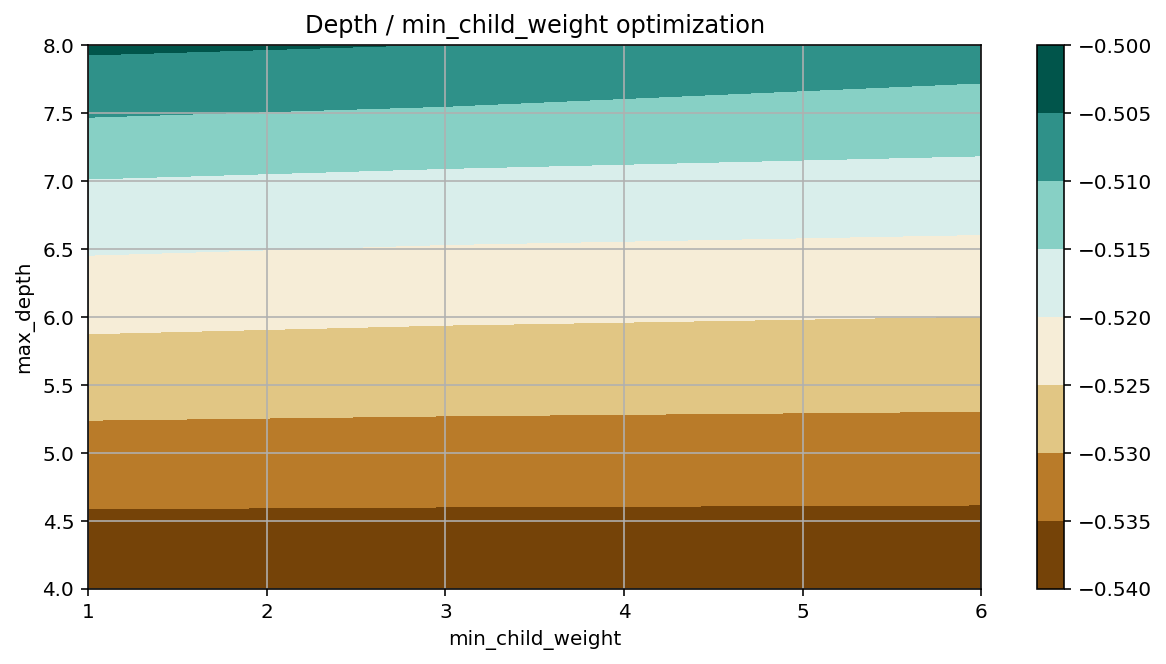

In [208]:
def convert_grid_scores(scores):
    _params = []
    _params_mae = []    
    for i in scores:
        _params.append(i['min_child_weight'])
        _params_mae.append(i['mean_test_score'])
    params = np.array(_params)
    grid_res = np.column_stack((_params,_params_mae))
    return [grid_res[:,i] for i in range(grid_res.shape[1])] 

for i in range(15):
    grid.cv_results_['params'][i]['mean_test_score'] = grid.cv_results_['mean_test_score'][i]

_,scores =  convert_grid_scores(grid.cv_results_['params'])
scores = scores.reshape(5,3)

plt.figure(figsize=(10,5))
cp = plt.contourf(xgb_param_grid['min_child_weight'], xgb_param_grid['max_depth'], scores, cmap='BrBG')
plt.colorbar(cp)
plt.title('Depth / min_child_weight optimization')
# plt.annotate('We use this', xy=(5.95, 7.95), xytext=(4, 7.5), arrowprops=dict(facecolor='white'), color='white')
# plt.annotate('Good for depth=7', xy=(5.98, 7.05), 
#              xytext=(4, 6.5), arrowprops=dict(facecolor='white'), color='white')
plt.xlabel('min_child_weight')
plt.ylabel('max_depth')
plt.grid(True)
plt.show()

### Step 3: 调节 gamma去降低过拟合风险

In [234]:
%%time

xgb_param_grid = {'gamma':[ 0.1 * i for i in range(0,5)]}

grid = GridSearchCV(XGBoostRegressor(eta=0.1, num_boost_round=50, max_depth=8, min_child_weight=1,
                                        colsample_bytree=0.5, subsample=0.5),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y.values)


[17:46:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:46:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[17:46:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:46:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[17:46:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

GridSearchCV(cv=5,
             estimator=<__main__.XGBoostRegressor object at 0x0000022319D2F5E0>,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4]},
             scoring=make_scorer(mae_score, greater_is_better=False))

In [236]:
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params'])
print('************************************')
print(grid.best_params_)
print('************************************')
print(grid.best_score_ )

[-0.50416316 -0.50398433 -0.50425329 -0.5050767  -0.50577489]
[{'gamma': 0.0}, {'gamma': 0.1}, {'gamma': 0.2}, {'gamma': 0.30000000000000004}, {'gamma': 0.4}]
************************************
{'gamma': 0.1}
************************************
-0.5039843290325946


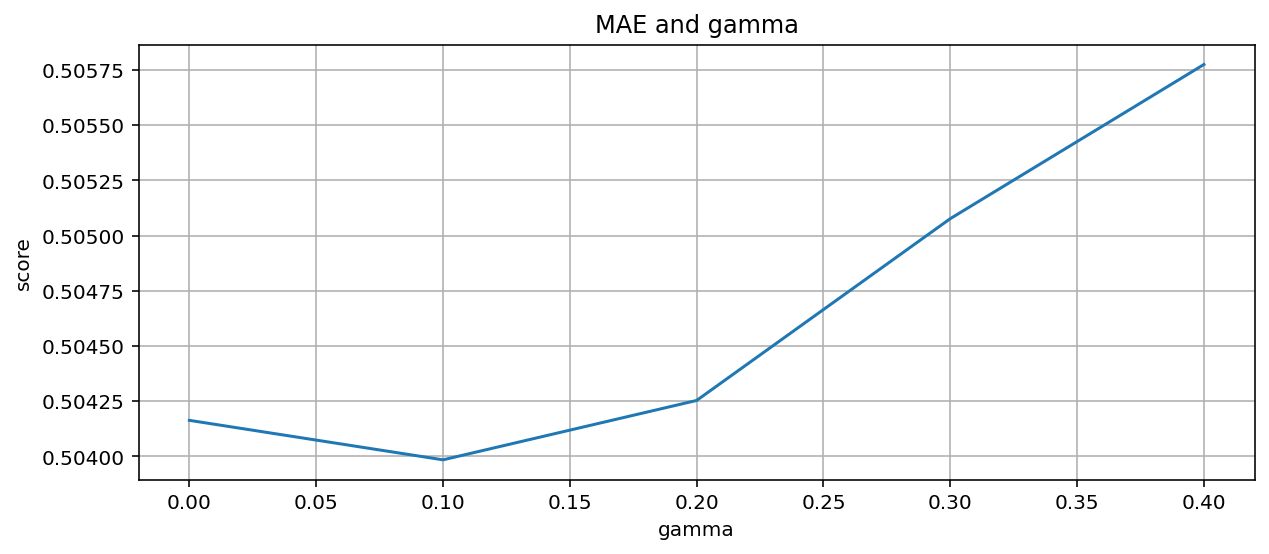

In [237]:
def convert_grid_scores(scores):
    _params = []
    _params_mae = []    
    for i in scores:
        _params.append(i['gamma'])
        _params_mae.append(i['mean_test_score'])
    params = np.array(_params)
    grid_res = np.column_stack((_params,_params_mae))
    return [grid_res[:,i] for i in range(grid_res.shape[1])] 

for i in range(5):
    grid.cv_results_['params'][i]['mean_test_score'] = grid.cv_results_['mean_test_score'][i]

_, scores =  convert_grid_scores(grid.cv_results_['params'])
# scores = scores.reshape(3,3)

gamma, y = convert_grid_scores(grid.cv_results_['params'])
plt.figure(figsize=(10,4))
plt.title('MAE and gamma')
plt.xlabel('gamma')
plt.ylabel('score')
plt.plot(gamma, -y)
plt.grid(True)
plt.show()

### Step 4: 调节样本采样方式 subsample 和 colsample_bytree

In [238]:
%%time

xgb_param_grid = {'subsample':[ 0.1 * i for i in range(6,9)],
                      'colsample_bytree':[ 0.1 * i for i in range(6,9)]}


grid = GridSearchCV(XGBoostRegressor(eta=0.1, gamma=0.1, num_boost_round=50, max_depth=8, min_child_weight=1),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)
grid.fit(train_x, train_y.values)



[17:52:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[17:52:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[17:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

GridSearchCV(cv=5,
             estimator=<__main__.XGBoostRegressor object at 0x00000223199FA700>,
             param_grid={'colsample_bytree': [0.6000000000000001,
                                              0.7000000000000001, 0.8],
                         'subsample': [0.6000000000000001, 0.7000000000000001,
                                       0.8]},
             scoring=make_scorer(mae_score, greater_is_better=False))

In [239]:
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params'])
print('************************************')
print(grid.best_params_)
print('************************************')
print(grid.best_score_ )


[-0.49507232 -0.49311791 -0.49317532 -0.48745139 -0.48652843 -0.485131
 -0.48293793 -0.48051653 -0.48055771]
[{'colsample_bytree': 0.6000000000000001, 'subsample': 0.6000000000000001}, {'colsample_bytree': 0.6000000000000001, 'subsample': 0.7000000000000001}, {'colsample_bytree': 0.6000000000000001, 'subsample': 0.8}, {'colsample_bytree': 0.7000000000000001, 'subsample': 0.6000000000000001}, {'colsample_bytree': 0.7000000000000001, 'subsample': 0.7000000000000001}, {'colsample_bytree': 0.7000000000000001, 'subsample': 0.8}, {'colsample_bytree': 0.8, 'subsample': 0.6000000000000001}, {'colsample_bytree': 0.8, 'subsample': 0.7000000000000001}, {'colsample_bytree': 0.8, 'subsample': 0.8}]
************************************
{'colsample_bytree': 0.8, 'subsample': 0.7000000000000001}
************************************
-0.4805165334007091


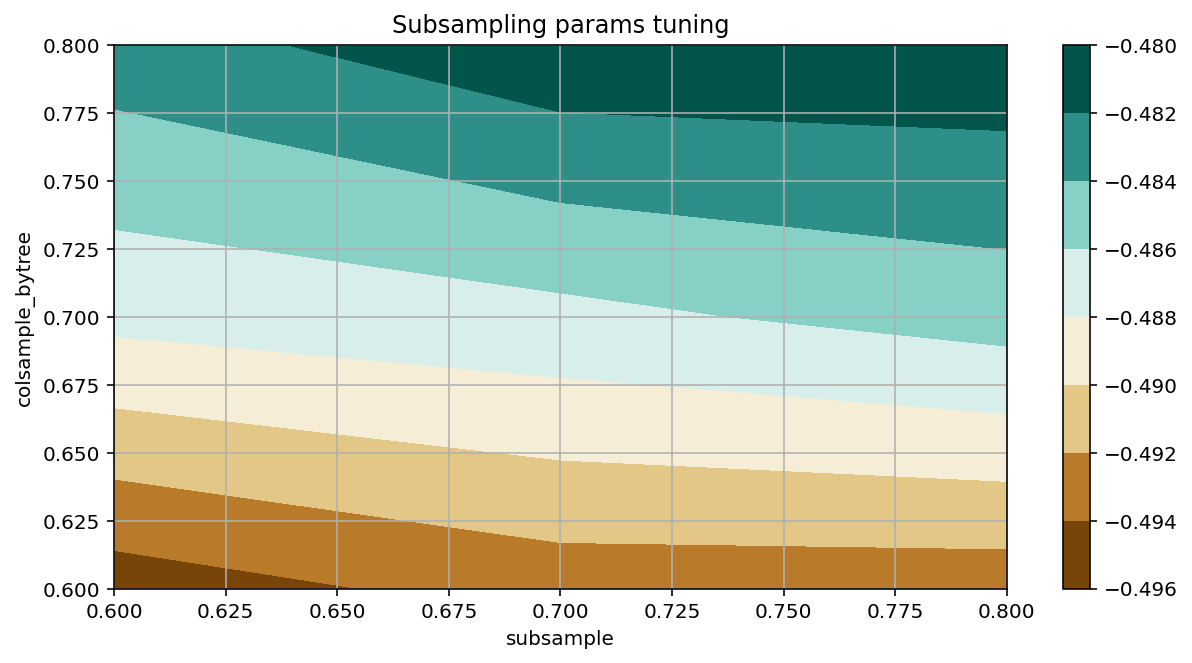

In [240]:
def convert_grid_scores(scores):
    _params = []
    _params_mae = []    
    for i in scores:
        _params.append(i['colsample_bytree'])
        _params_mae.append(i['mean_test_score'])
    params = np.array(_params)
    grid_res = np.column_stack((_params,_params_mae))
    return [grid_res[:,i] for i in range(grid_res.shape[1])] 

for i in range(9):
    grid.cv_results_['params'][i]['mean_test_score'] = grid.cv_results_['mean_test_score'][i]

_, scores =  convert_grid_scores(grid.cv_results_['params'])
scores = scores.reshape(3,3)

plt.figure(figsize=(10,5))
cp = plt.contourf(xgb_param_grid['subsample'], xgb_param_grid['colsample_bytree'], scores, cmap='BrBG')
plt.colorbar(cp)
plt.title('Subsampling params tuning')
plt.annotate('Optimum', xy=(0.895, 0.6), xytext=(0.8, 0.695), arrowprops=dict(facecolor='black'))
plt.xlabel('subsample')
plt.ylabel('colsample_bytree')
plt.grid(True)
plt.show() 



（也可以增大学习率减小树个数）

参数优化的最后一步是降低学习速度，同时增加更多的估计量

First, we plot different learning rates for a simpler model (50 trees):

### Step 5: 减小学习率并增大树个数

In [242]:
%%time
    
xgb_param_grid = {'eta':[0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03]}
grid = GridSearchCV(XGBoostRegressor(num_boost_round=50, gamma=0.1, max_depth=8, min_child_weight=1,
                                        colsample_bytree=0.8, subsample=0.7),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y.values) 


[17:55:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[17:55:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[17:55:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

GridSearchCV(cv=5,
             estimator=<__main__.XGBoostRegressor object at 0x0000022319B76F40>,
             param_grid={'eta': [0.5, 0.4, 0.3, 0.2, 0.1, 0.075, 0.05, 0.04,
                                 0.03]},
             scoring=make_scorer(mae_score, greater_is_better=False))

In [243]:
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params'])
print('************************************')
print(grid.best_params_)
print('************************************')
print(grid.best_score_ )

[-0.41657498 -0.42865265 -0.44207998 -0.45944291 -0.48051653 -0.49359024
 -0.51888977 -0.53669801 -0.56208963]
[{'eta': 0.5}, {'eta': 0.4}, {'eta': 0.3}, {'eta': 0.2}, {'eta': 0.1}, {'eta': 0.075}, {'eta': 0.05}, {'eta': 0.04}, {'eta': 0.03}]
************************************
{'eta': 0.5}
************************************
-0.41657497905875224


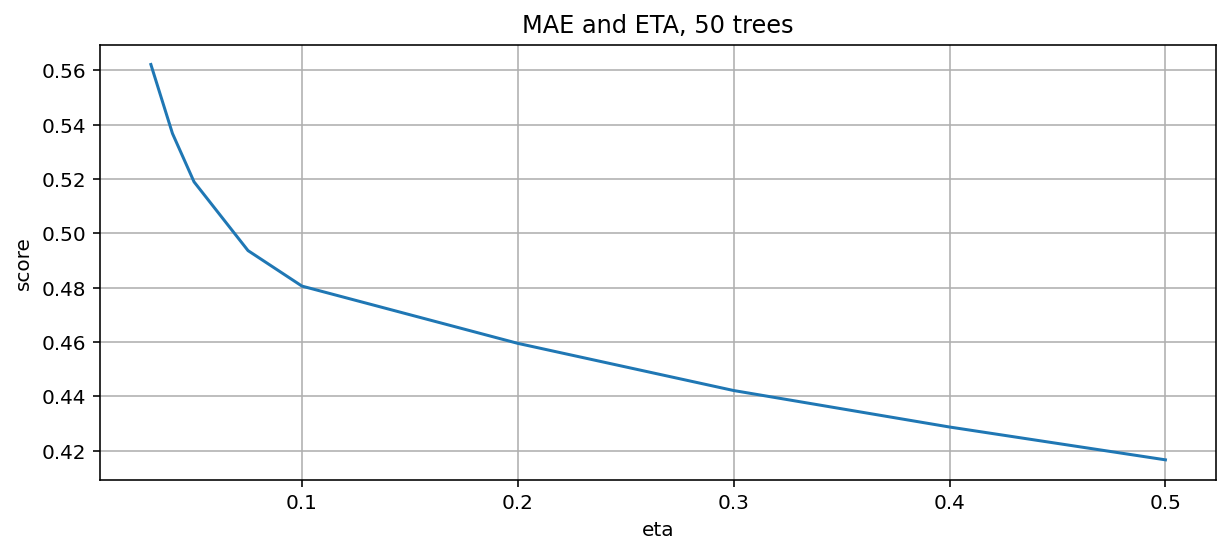

In [244]:
def convert_grid_scores(scores):
    _params = []
    _params_mae = []    
    for i in scores:
        _params.append(i['eta'])
        _params_mae.append(i['mean_test_score'])
    params = np.array(_params)
    grid_res = np.column_stack((_params,_params_mae))
    return [grid_res[:,i] for i in range(grid_res.shape[1])] 

for i in range(9):
    grid.cv_results_['params'][i]['mean_test_score'] = grid.cv_results_['mean_test_score'][i]

eta, y = convert_grid_scores(grid.cv_results_['params'])
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 50 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

In [245]:
xgb_param_grid = {'eta':[0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03]}
grid = GridSearchCV(XGBoostRegressor(num_boost_round=100, gamma=0.1, max_depth=8, min_child_weight=1,
                                        colsample_bytree=0.8, subsample=0.7),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y.values)


[17:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[17:57:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[17:57:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

GridSearchCV(cv=5,
             estimator=<__main__.XGBoostRegressor object at 0x0000022319B13CD0>,
             param_grid={'eta': [0.5, 0.4, 0.3, 0.2, 0.1, 0.075, 0.05, 0.04,
                                 0.03]},
             scoring=make_scorer(mae_score, greater_is_better=False))

[-0.35162752 -0.3724617  -0.39739443 -0.42376323 -0.45565448 -0.4675493
 -0.48119866 -0.49094556 -0.50709722]
[{'eta': 0.5}, {'eta': 0.4}, {'eta': 0.3}, {'eta': 0.2}, {'eta': 0.1}, {'eta': 0.075}, {'eta': 0.05}, {'eta': 0.04}, {'eta': 0.03}]
************************************
{'eta': 0.5}
************************************
-0.3516275219459494


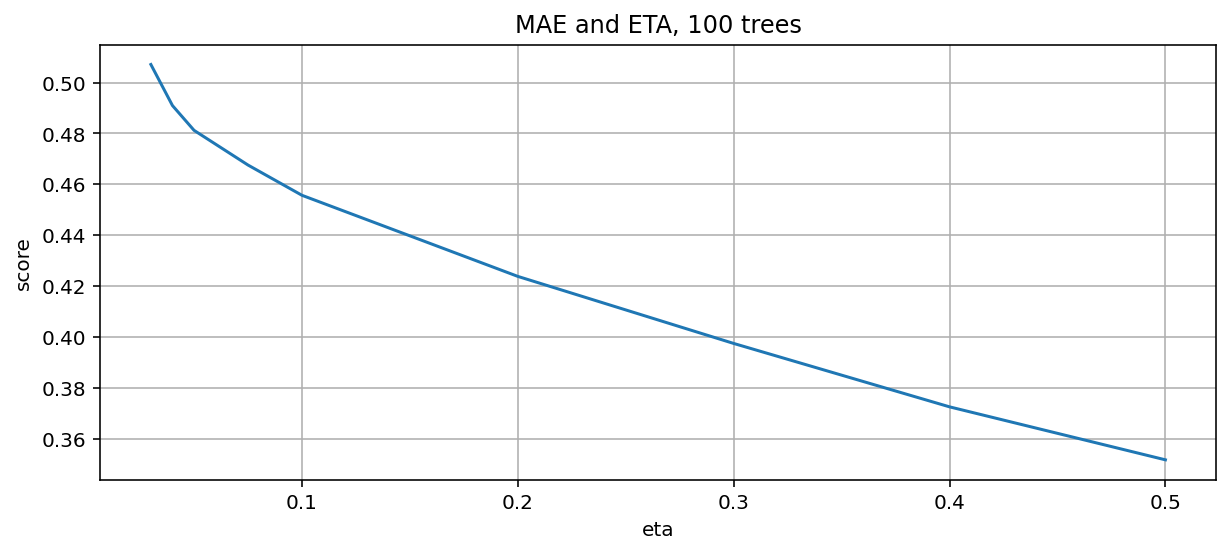

In [246]:
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params'])
print('************************************')
print(grid.best_params_)
print('************************************')
print(grid.best_score_ )

for i in range(9):
    grid.cv_results_['params'][i]['mean_test_score'] = grid.cv_results_['mean_test_score'][i]

eta, y = convert_grid_scores(grid.cv_results_['params'])
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 100 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

In [247]:
%%time

xgb_param_grid = {'eta':[0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03]}
grid = GridSearchCV(XGBoostRegressor(num_boost_round=200, gamma=0.1, max_depth=8, min_child_weight=1,
                                        colsample_bytree=0.8, subsample=0.7),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y.values)

[18:01:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[18:02:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[18:02:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

GridSearchCV(cv=5,
             estimator=<__main__.XGBoostRegressor object at 0x0000022319CD8490>,
             param_grid={'eta': [0.5, 0.4, 0.3, 0.2, 0.1, 0.075, 0.05, 0.04,
                                 0.03]},
             scoring=make_scorer(mae_score, greater_is_better=False))

[-0.26845043 -0.29586303 -0.32619414 -0.368811   -0.42078642 -0.43797086
 -0.4541993  -0.46345921 -0.4740799 ]
[{'eta': 0.5}, {'eta': 0.4}, {'eta': 0.3}, {'eta': 0.2}, {'eta': 0.1}, {'eta': 0.075}, {'eta': 0.05}, {'eta': 0.04}, {'eta': 0.03}]
************************************
{'eta': 0.5}
************************************
-0.26845042851163375


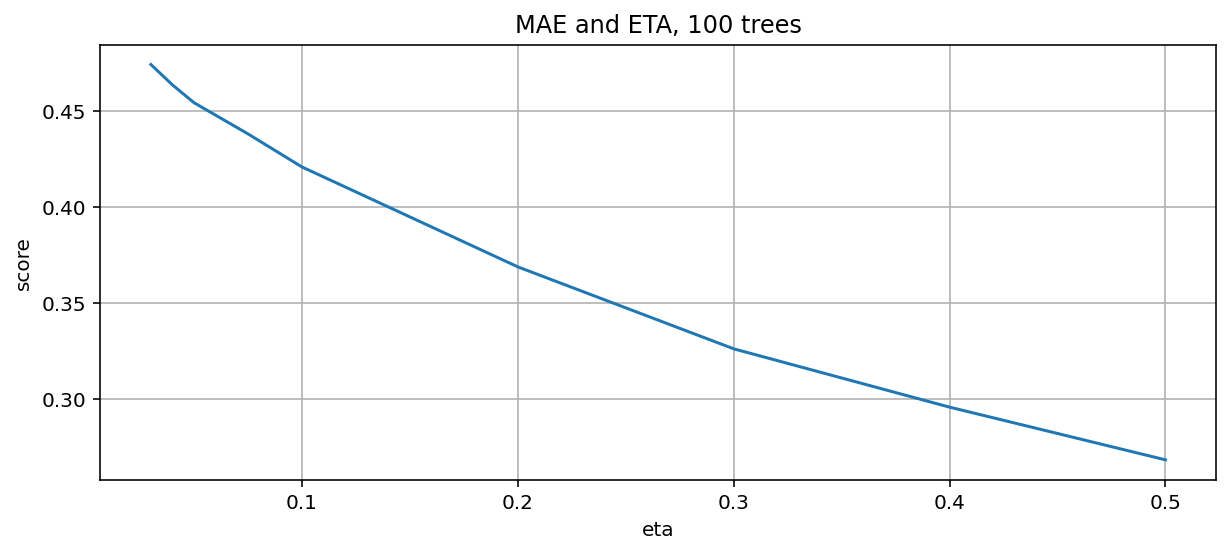

In [248]:
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params'])
print('************************************')
print(grid.best_params_)
print('************************************')
print(grid.best_score_ )

for i in range(9):
    grid.cv_results_['params'][i]['mean_test_score'] = grid.cv_results_['mean_test_score'][i]

eta, y = convert_grid_scores(grid.cv_results_['params'])
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 100 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

In [250]:
%%time

# Final XGBoost model

bst = XGBoostRegressor(num_boost_round=200, eta=0.5, gamma=0.1, max_depth=8, min_child_weight=1,
                                        colsample_bytree=0.8, subsample=0.7)
cv = bst.kfold(train_x, train_y, nfold=5)

[18:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[18:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.

[18:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

In [252]:
test_preds = bst.predict(test_x)
test_preds

[18:11:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



array([ 0.01783504,  0.01012165,  1.1553732 , ...,  0.5242734 ,
        0.68645823, -0.2036978 ], dtype=float32)